# Cricket Batting Analysis

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Batsman Data

In [4]:
df = pd.read_csv('Batsman.csv')

### View first 5 rows and last 5 rows

In [6]:
df.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [7]:
df.isnull().sum()

RunsScored         0
BallsFaced         0
BattingPosition    0
Dismissal          0
Inning             0
Opposition         0
Year               0
dtype: int64

### Descriptive Statistics

In [9]:
df.describe(include='all')

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
count,208.000000,208.000000,208.000000,208,208.000000,208,208.000000
unique,NaN,NaN,NaN,7,NaN,12,NaN
top,NaN,NaN,NaN,Caught,NaN,Sri Lanka,NaN
freq,NaN,NaN,NaN,121,NaN,45,NaN
mean,49.192308,52.961538,3.264423,NaN,1.567308,NaN,2013.240385
std,43.797641,39.850548,0.781602,NaN,0.496644,NaN,2.750477
min,0.000000,0.000000,1.000000,NaN,1.000000,NaN,2008.000000
25%,10.750000,18.000000,3.000000,NaN,1.000000,NaN,2011.000000
50%,35.000000,46.500000,3.000000,NaN,2.000000,NaN,2013.000000
75%,81.250000,83.250000,3.000000,NaN,2.000000,NaN,2015.000000


### Q1 What is the percentage for Kohli being Not Out.

In [10]:
df['Dismissal'].value_counts(normalize=True)*100

Dismissal
Caught        58.173077
NO            17.788462
Bowled        10.096154
LBW            5.769231
Run out        5.769231
Stumped        1.923077
Hit wicket     0.480769
Name: proportion, dtype: float64

In [11]:
df['Dismissal'].value_counts().index

Index(['Caught', 'NO', 'Bowled', 'LBW', 'Run out', 'Stumped', 'Hit wicket'], dtype='object', name='Dismissal')

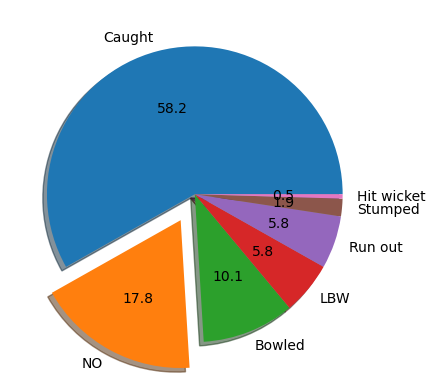

In [17]:
# Using plot
# Pie chart not available with Seaborn, use Matplotlib
plt.pie(df['Dismissal'].value_counts(),autopct='%.1f',labels=df['Dismissal'].value_counts().index,explode=[0,0.2,0,0,0,0,0],
       shadow=True)
plt.show()

### Q2 Find the number of times when kohli scored less than or equal to 7 runs?

In [19]:
df[df['RunsScored']<=7].shape

(40, 7)

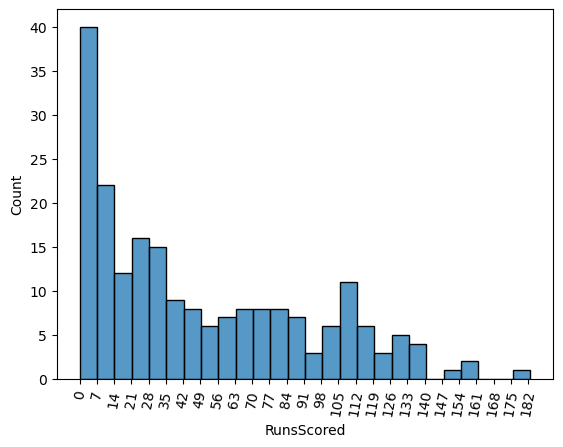

In [21]:
sns.histplot(x='RunsScored',data=df,binwidth=7)
plt.xticks(np.arange(0,183,7), rotation=80)
plt.show()

### Q3 Show the 5 point summary of runs scored by Kohli?

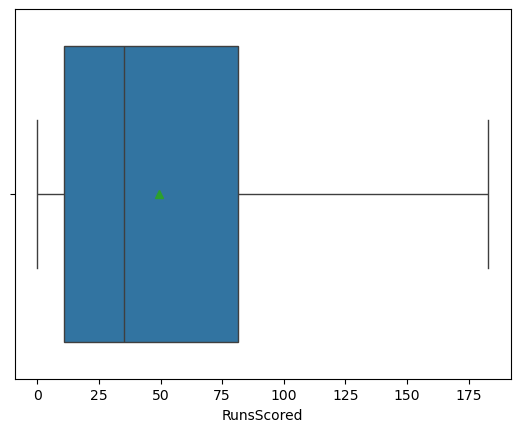

In [26]:
sns.boxplot(data=df,x='RunsScored',showmeans=True)
plt.show()

### Q4 What is the best way that the opposition team bowlers can get Kohli out?

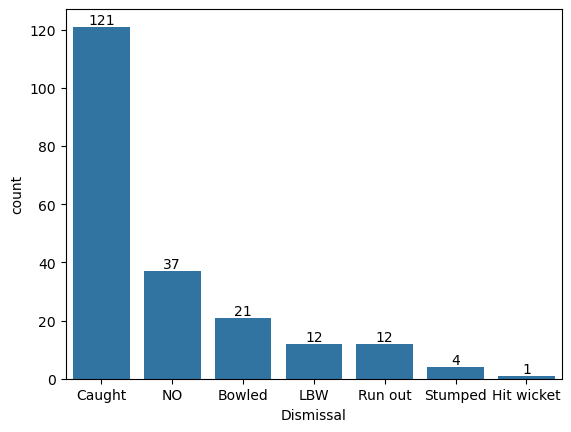

In [24]:
bx = sns.countplot(data=df,x='Dismissal',order=df['Dismissal'].value_counts().index)
for containers in bx.containers:
    bx.bar_label(containers)
plt.show()

### Q5. Against which opposition team Kohli has played the most in his career?

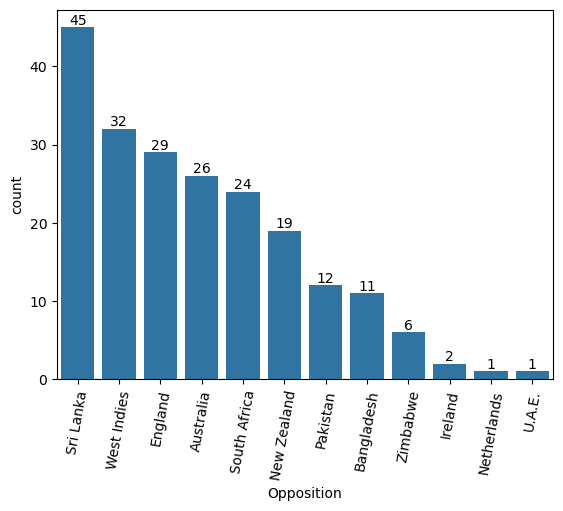

In [30]:
ax = sns.countplot(data=df,x='Opposition',order=df['Opposition'].value_counts().index)
for containers in ax.containers:  # For showing values above Bars
   ax.bar_label(containers) 
plt.xticks(rotation=80)
plt.show()

### Q6. Find out some interesting dismissal patterns in Kohli's career againsts the oppositions.

In [27]:
# Category vs Category
# creating a cross tab
ct=pd.crosstab(df['Opposition'],df['Dismissal'])
ct

Dismissal,Bowled,Caught,Hit wicket,LBW,NO,Run out,Stumped
Opposition,,,,,,,
Australia,2,18,0,1,3,2,0
Bangladesh,3,3,0,1,3,0,1
England,4,17,1,2,4,0,1
Ireland,0,0,0,0,1,1,0
Netherlands,1,0,0,0,0,0,0
New Zealand,0,16,0,0,3,0,0
Pakistan,2,8,0,0,2,0,0
South Africa,0,16,0,0,5,3,0
Sri Lanka,4,24,0,6,8,3,0


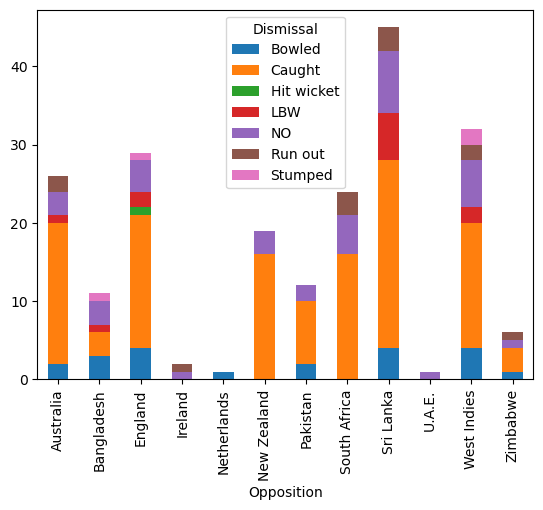

In [29]:
ct.plot(kind='bar',stacked=True)
plt.show()

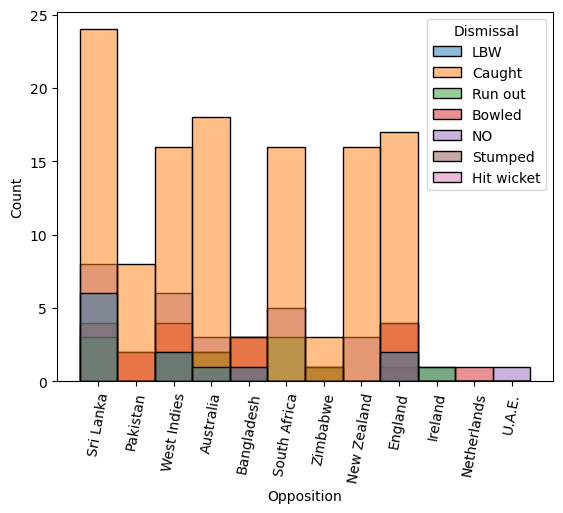

In [31]:
# 2nd method
sns.histplot(data=df,x='Opposition',hue='Dismissal')
plt.xticks(rotation=80)
plt.show()

### Q7. Which opposition has Kohli scored most runs against? Find the mean and median score against different oppositions and use a boxplot to represent it?

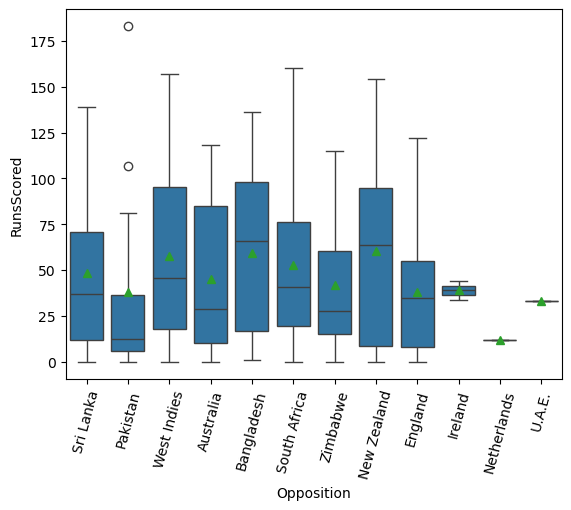

In [33]:
sns.boxplot(data=df,x='Opposition',y='RunsScored',showmeans=True)
plt.xticks(rotation=75)
plt.show()

### Q8. Compare the runs scored by Kohli in 1st innings vs the 2nd innings.

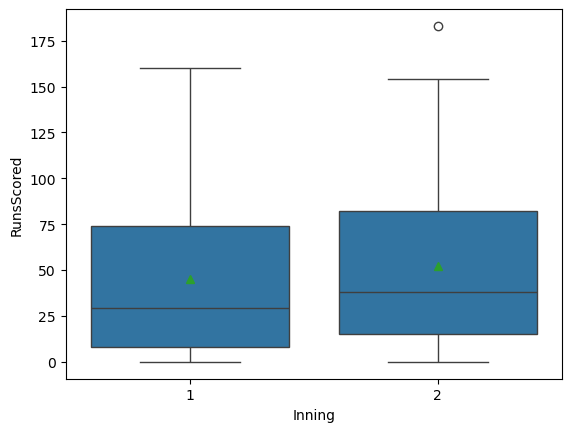

In [35]:
sns.boxplot(data=df,x='Inning',y='RunsScored',showmeans=True)
plt.show()

## Pre and Post transformation comparison ( Transformation after 2012)

In [48]:
df['post_transform'] = df['Year']>2012

In [50]:
df.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year,post_transform
0,12,22,2,LBW,1,Sri Lanka,2008,False
1,37,67,2,Caught,2,Sri Lanka,2008,False
2,25,38,1,Run out,1,Sri Lanka,2008,False
3,54,66,1,Bowled,1,Sri Lanka,2008,False
4,31,46,1,LBW,2,Sri Lanka,2008,False


### Q9. Use a Boxplot to compare the runs Scored before and after transformation

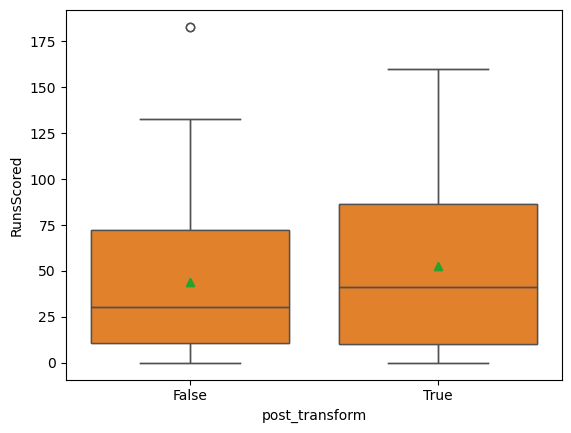

In [54]:
sns.boxplot(data=df,x='post_transform',y='RunsScored',showmeans=True)
plt.show()

### Q10. Use a Boxplot to compare the Balls Faced before and after transformation

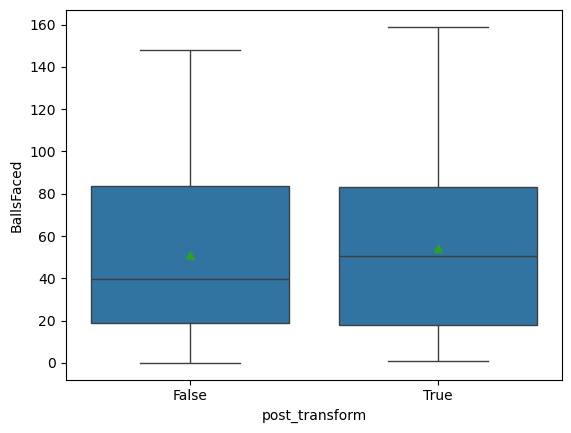

In [60]:
sns.boxplot(data=df,x='post_transform',y='BallsFaced',showmeans=True)
plt.show()

### Q11. compare the dismissal patterns before and after transformation.

In [84]:
ct2=pd.crosstab(df['post_transform'],df['Dismissal'])
ct2

Dismissal,Bowled,Caught,Hit wicket,LBW,NO,Run out,Stumped
post_transform,,,,,,,
False,11,48,1,8,12,6,2
True,10,73,0,4,25,6,2


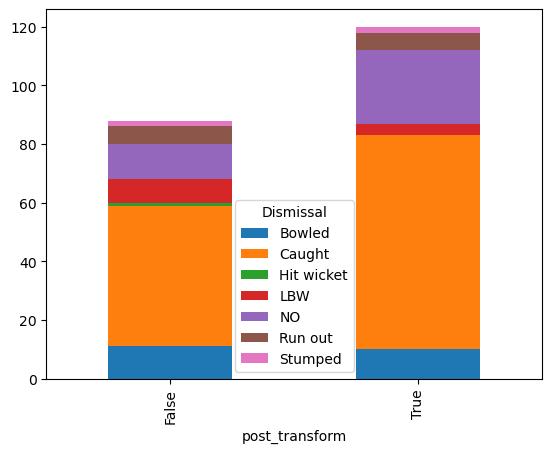

In [86]:
ct2.plot(kind='bar',stacked=True)
plt.show()

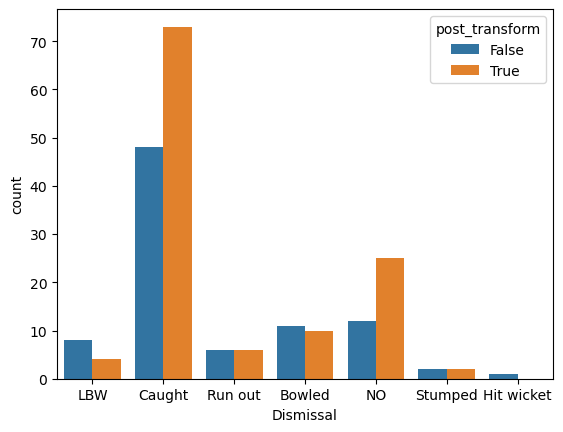

In [96]:
# 2nd Method
sns.countplot(data=df,x='Dismissal',hue='post_transform')
plt.show()

### Q12. Visualize Yearly trend in run scored by Virat Kohli

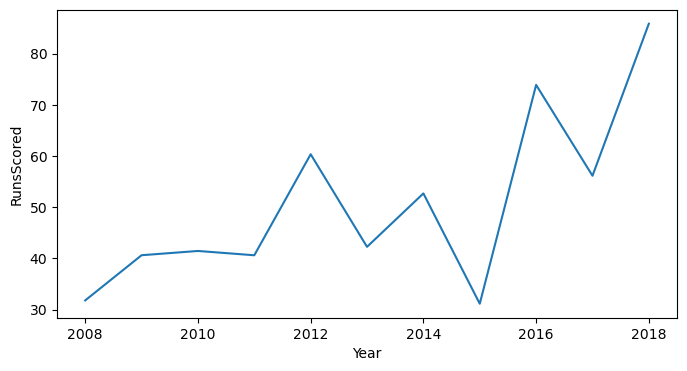

In [110]:
plt.figure(figsize=(8,4))
sns.lineplot(data=df,x='Year',y='RunsScored',errorbar=None)
plt.show()

### Q13. Relationship between RunsScored & BallsFaced over different batting positions?

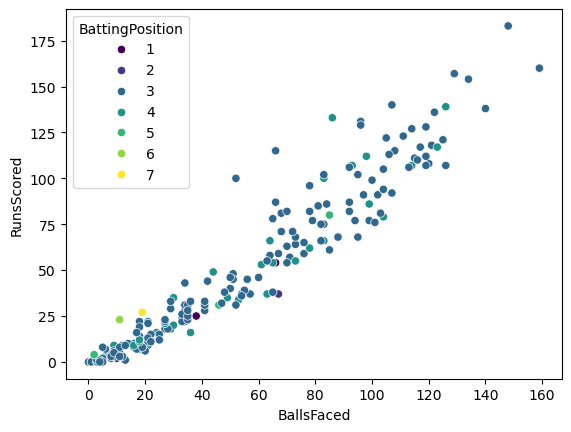

In [41]:
sns.scatterplot(data=df,x='BallsFaced',y='RunsScored',hue='BattingPosition',palette='viridis')
plt.show()

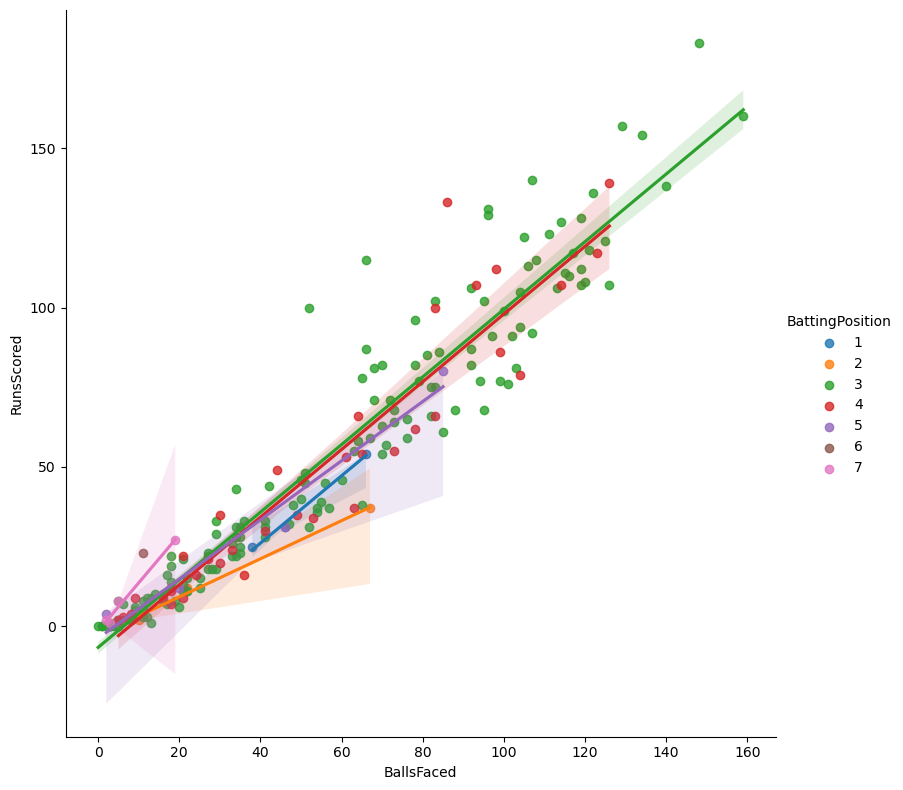

In [128]:
sns.lmplot(data=df,x='BallsFaced',y='RunsScored',hue='BattingPosition',height=8)
plt.show()

### Q14. How the batting position has changed with different oppositions yearly?

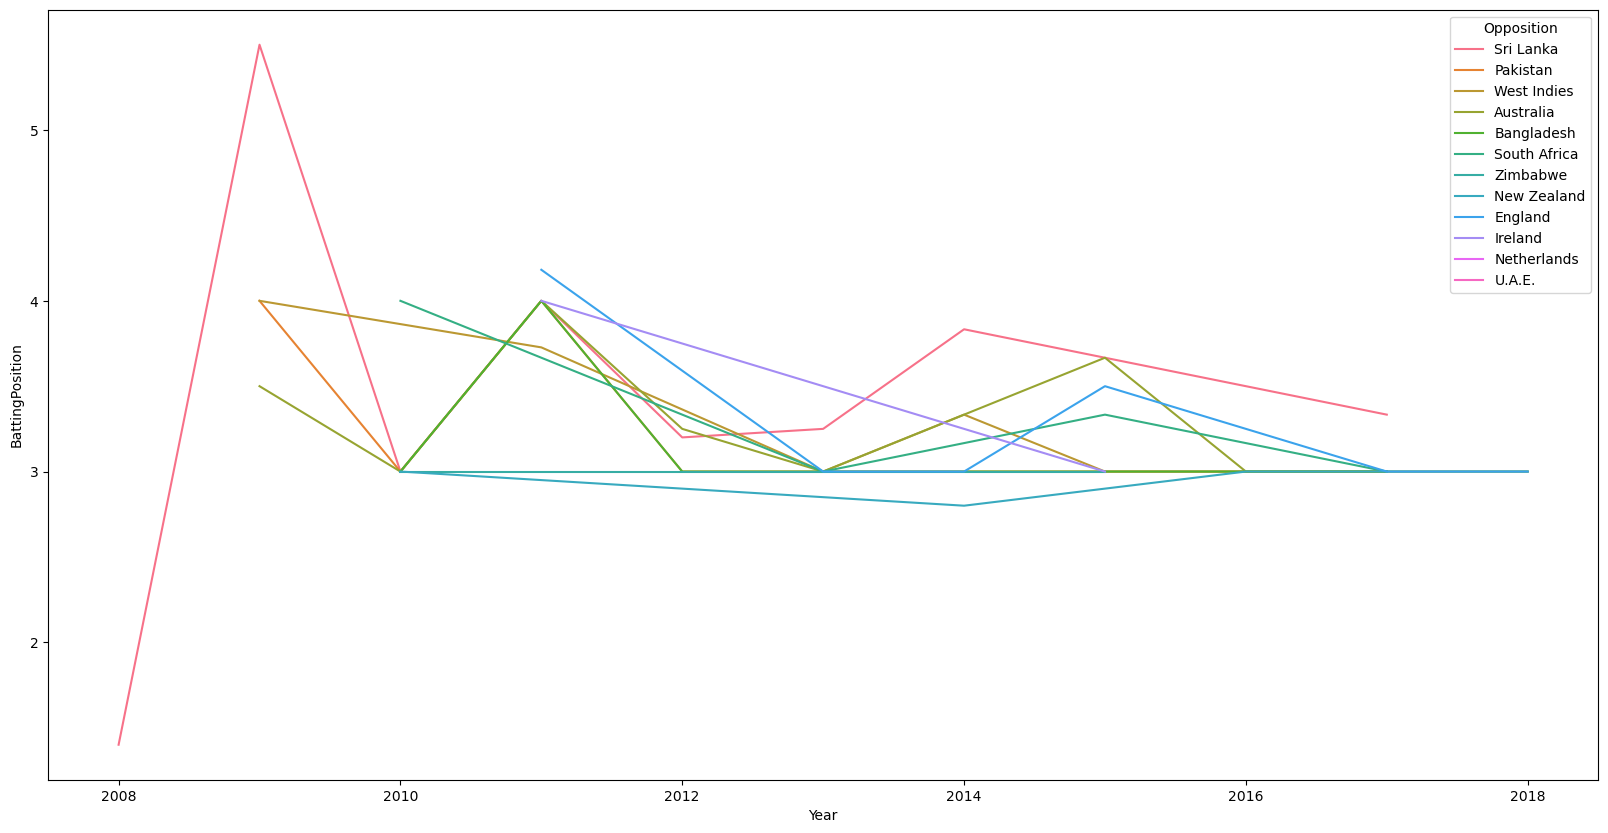

In [148]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='Year',y='BattingPosition',hue='Opposition',errorbar=None)
plt.show()

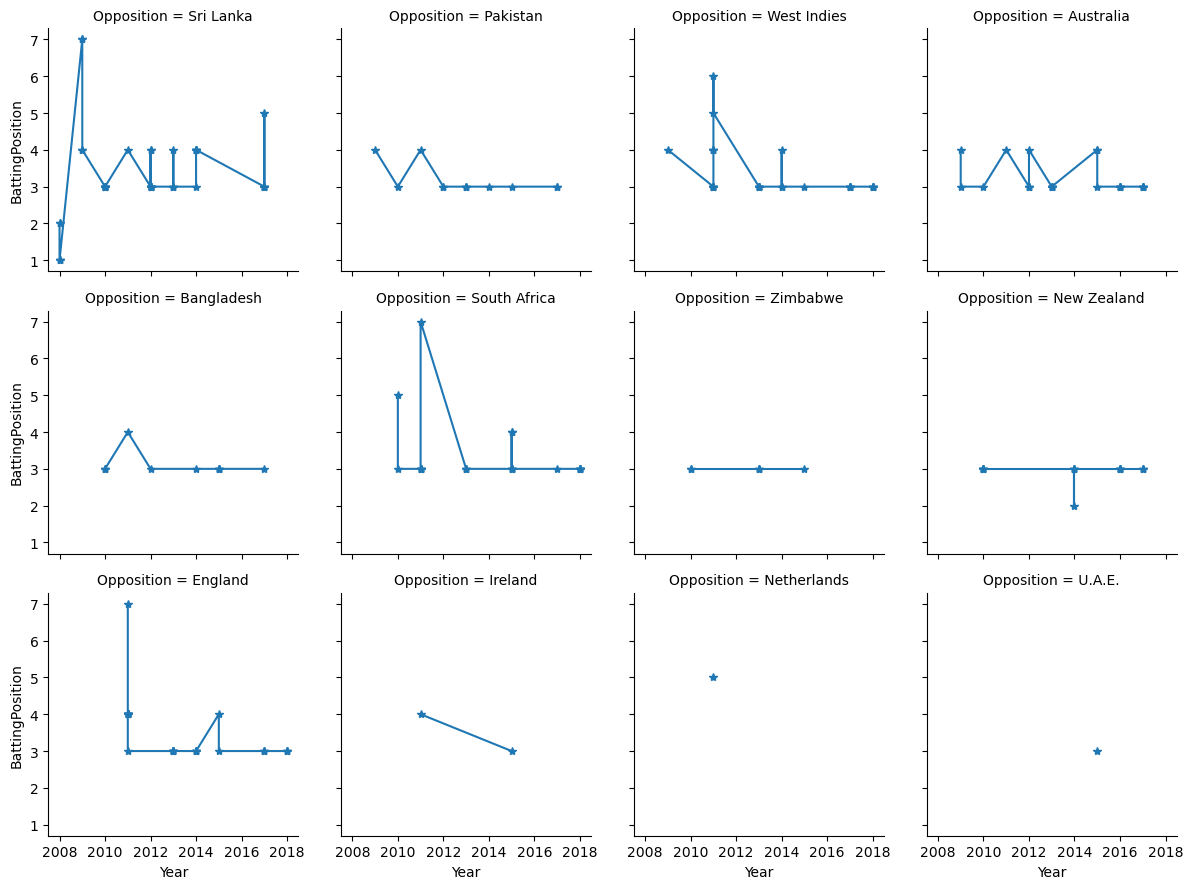

In [162]:
# We need subplots, as above plot is cluttered
g = sns.FacetGrid(data=df,col='Opposition',col_wrap=4)
g.map(plt.plot,'Year','BattingPosition',marker='*')
plt.show()